# Evaluate results of experiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import re

pd.options.display.max_columns = 999

In [2]:
output_folder = pathlib.Path('output/results/')
sns.set_context("paper", font_scale=1.4,)

In [3]:
def prepare(df):
    df['type'] = ['log-model','log-md','md-m']
    df['Precision'] = df['logModel_largestEigenValue'] / df['model_largestEigenValue']
    df['Recall'] = df['logModel_largestEigenValue'] / df['log_largestEigenValue']
    return df

# Collect results

In [4]:
dfs = []

for f_out in output_folder.glob('Figure*'):
    run_id = re.findall(r'Figure [0-9]+[a-z]?.pnml', f_out.name)[0]
    run_folder = output_folder / run_id
    print(f_out)
    
    for f_out_file in run_folder.glob('*.csv'):
        try:
            n = int(re.findall(r'[0-9]+', f_out_file.name)[0])
            # print(f_out, n)
            df = pd.read_csv(f_out_file, sep=';')
            df = prepare(df)
            df['logSize'] = n
            df['source'] = run_id
            dfs.append(df)
        except:
            pass
df = pd.concat(dfs)

output/results/Figure 11.pnml
output/results/Figure 06.pnml
output/results/Figure 10.pnml
output/results/Figure 01.pnml
output/results/Figure 13b.pnml
output/results/Figure 13a.pnml
output/results/Figure 12.pnml
output/results/Figure 05.pnml
output/results/Figure 09.pnml


In [5]:
df.head()

,model_name,model_timeMillis,model_timeDeterminization,model_timeMinimization,model_timeEigen,model_netSize,model_automatonSizeOrig,model_automatonSizeDeterministic,model_automatonSize,model_entropy,model_largestEigenValue,model_entropyComputationConverged,model_convergenceThreshold,logModel_name,logModel_timeMillis,logModel_timeDeterminization,logModel_timeMinimization,logModel_timeEigen,logModel_netSize,logModel_automatonSizeOrig,logModel_automatonSizeDeterministic,logModel_automatonSize,logModel_entropy,logModel_largestEigenValue,logModel_entropyComputationConverged,logModel_convergenceThreshold,log_name,log_timeMillis,log_timeDeterminization,log_timeMinimization,log_timeEigen,log_netSize,log_automatonSizeOrig,log_automatonSizeDeterministic,log_automatonSize,log_entropy,log_largestEigenValue,log_entropyComputationConverged,log_convergenceThreshold,type,Precision,Recall,logSize,source
0,noID imported from (data/javert/Figure 11.pnml),0,0,0,1,11,5,5,5,1.039817,2.055967,True,1.000000e-07,Log8 (from noID imported from (data/javert/Fig...,0,0,0,3,10,13,13,13,0.383291,1.304314,True,1.000000e-07,Log8 (from noID imported from (data/javert/Fig...,0,0,0,3,10,13,13,13,0.383291,1.304314,True,1.000000e-07,log-model,0.634404,1.000000,10,Figure 11.pnml
1,94b4044c-1699-4078-9fcc-8c11be8b2d09,0,0,0,3,20,8,8,8,0.324110,1.251892,True,1.000000e-07,Log8 (from noID imported from (data/javert/Fig...,0,0,1,0,10,7,7,7,0.266896,1.203216,True,1.000000e-07,Log8 (from noID imported from (data/javert/Fig...,0,0,1,2,10,13,13,13,0.383291,1.304314,True,1.000000e-07,log-md,0.961118,0.922490,10,Figure 11.pnml
2,noID imported from (data/javert/Figure 11.pnml),0,0,0,0,5,5,5,5,1.039817,2.055967,True,1.000000e-07,MdM,0,0,0,3,8,8,8,8,0.324110,1.251892,True,1.000000e-07,94b4044c-1699-4078-9fcc-8c11be8b2d09,0,0,0,3,8,8,8,8,0.324110,1.251892,True,1.000000e-07,md-m,0.608907,1.000000,10,Figure 11.pnml
0,noID imported from (data/javert/Figure 11.pnml),0,1,0,0,11,5,5,5,1.039817,2.055967,True,1.000000e-07,Log8 (from noID imported from (data/javert/Fig...,0,1,8,50,100000,1481,1481,1481,0.844911,1.796154,True,1.000000e-07,Log8 (from noID imported from (data/javert/Fig...,0,1,8,50,100000,1481,1481,1481,0.844911,1.796154,True,1.000000e-07,log-model,0.873630,1.000000,100000,Figure 11.pnml
1,9fe4639e-fd4a-4e54-ade4-43b74ea2923a,0,0,1,2,20,8,8,8,0.379087,1.300518,True,1.000000e-07,Log8 (from noID imported from (data/javert/Fig...,0,0,0,2,100000,8,8,8,0.379087,1.300518,True,1.000000e-07,Log8 (from noID imported from (data/javert/Fig...,0,1,8,47,100000,1481,1481,1481,0.844911,1.796154,True,1.000000e-07,log-md,1.000000,0.724057,100000,Figure 11.pnml


# Precision
We analyze precision of:
* the simulated log vs. the model
* the simulated log vs. the discovered model
* the discovered model vs. the model

In [6]:
img_out_folder = pathlib.Path('evaluation')
img_out_folder.mkdir(exist_ok=True)

In [7]:
def plot_lines(df, run_id, y_type='Precision'):
    f, ax = plt.subplots(figsize=(8, 5))
    ax.set(xscale="log")
    ax.set_title("Experiment run "+str(run_id))
    
    sns_plot = sns.lineplot(x='logSize',y=y_type, style='type', hue='type', data=df,markers=True).get_figure()
    ax.set_ylim(-0.03,1.03)
    img_name = str(img_out_folder / str(str(run_id) + "_" + y_type+".png"))
    sns_plot.savefig(img_name)
        
    return sns_plot

In [8]:
runs = sorted(df['source'].drop_duplicates().values)

Figure 01.pnml
Figure 05.pnml
Figure 06.pnml
Figure 09.pnml
Figure 10.pnml
Figure 11.pnml
Figure 12.pnml
Figure 13a.pnml
Figure 13b.pnml


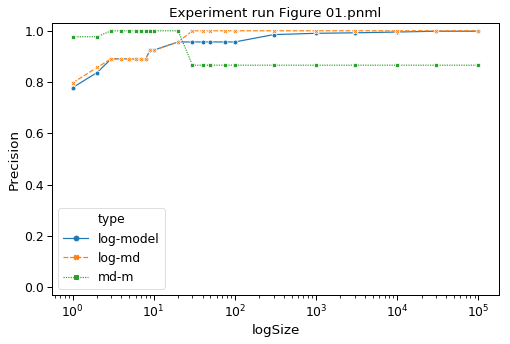

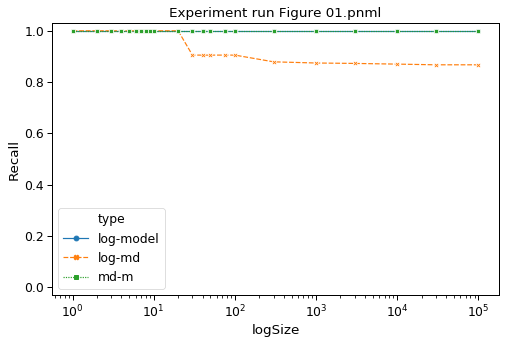

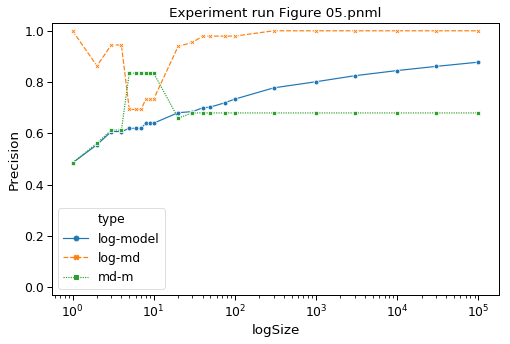

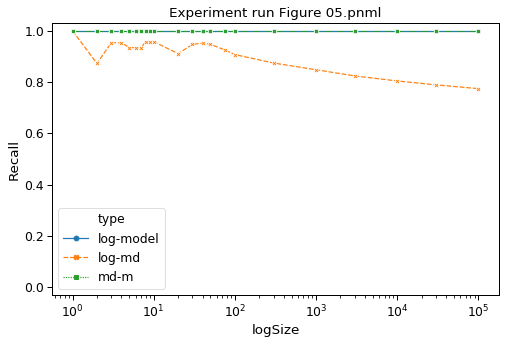

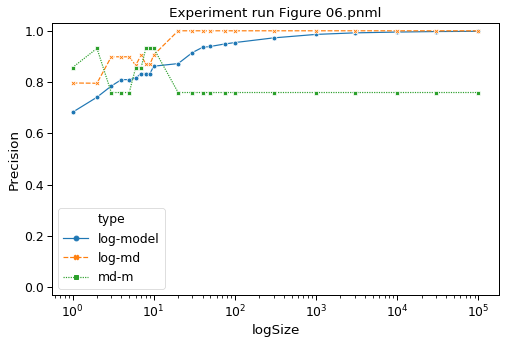

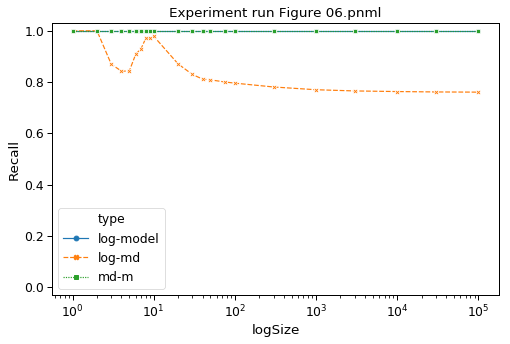

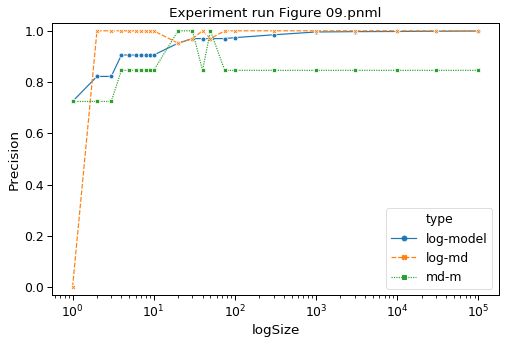

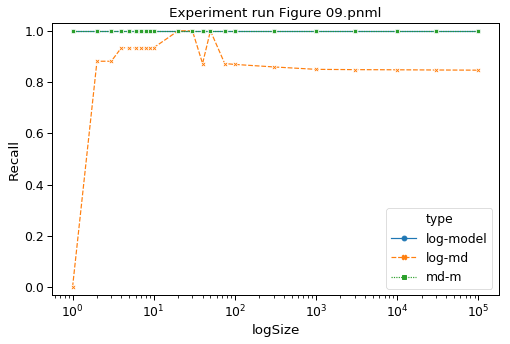

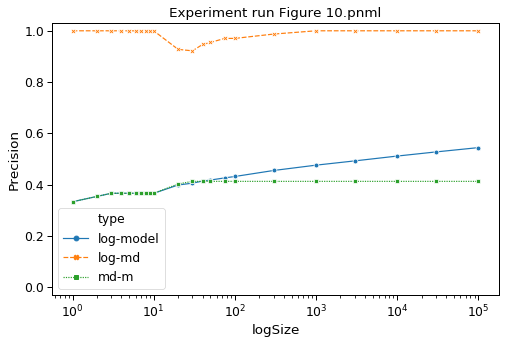

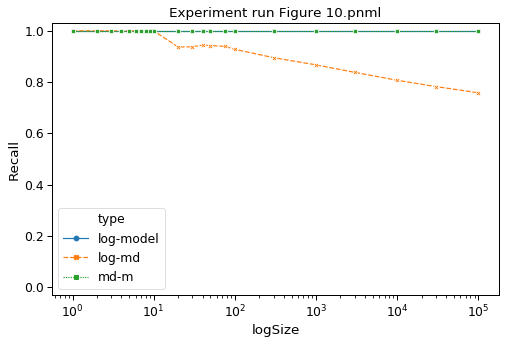

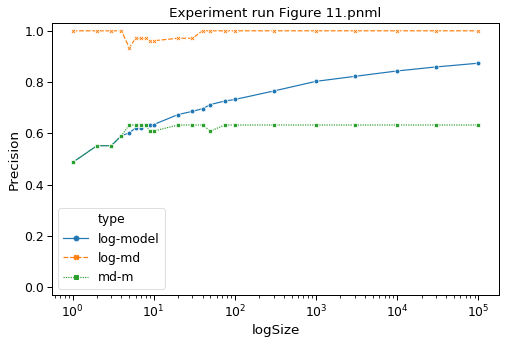

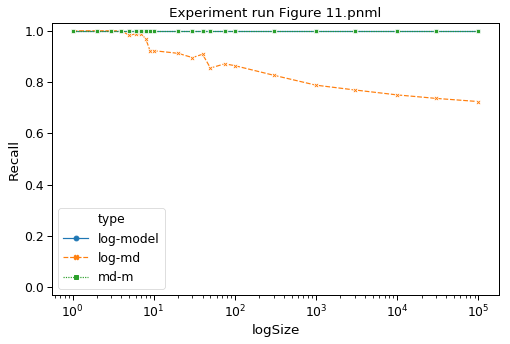

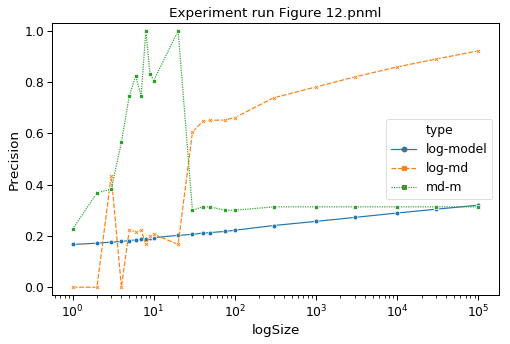

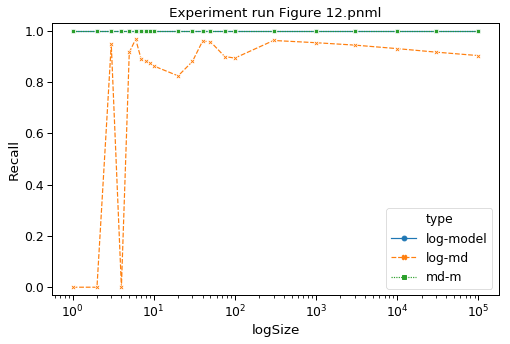

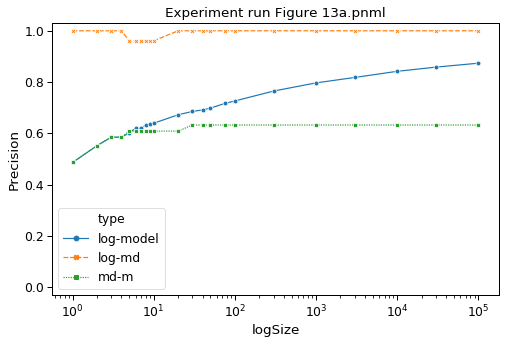

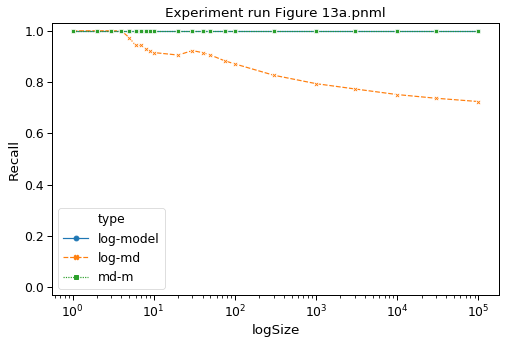

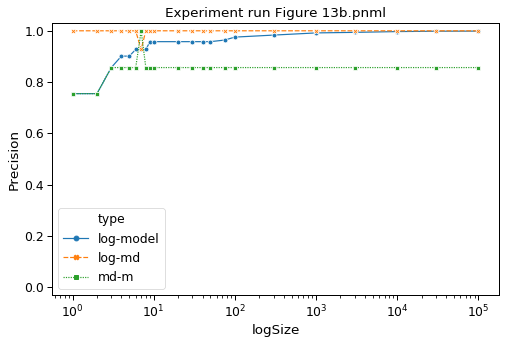

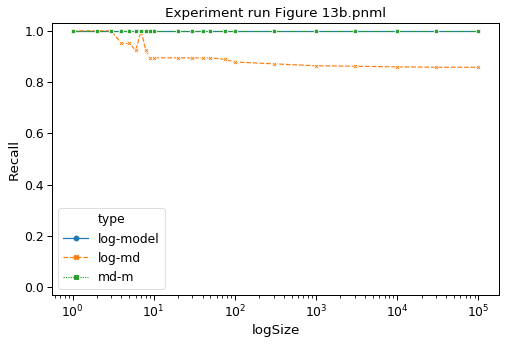

In [9]:
for run_id in runs:
    print(run_id)
    plot_lines(df.loc[lambda x: x['source']==run_id], run_id)
    plot_lines(df.loc[lambda x: x['source']==run_id], run_id, y_type='Recall')
    

In [19]:
ls

00_Experiment_TOSEM-selected_models.ipynb       LICENSE
00_Experiment_TOSEM.ipynb                       README.md
01_Experiment_Evaluation-selected-models.ipynb  data/
01_Experiment_Evaluation.ipynb                  evaluation/
Dockerfile                                      lib/
Experiment2.ipynb                               openxes/
Experiment3.ipynb                               output/
Experiment_TOSEM.ipynb                          pnml_test.pnml
HelloWorld.ipynb                                requirements.txt


# Interpretation:

## Precision graphs:
* The green curve "md-m" shows how the discovered model $M_d$ gets closer to the real model $M$. At logsize 10, the discovered model is the same as the original model $M$. Before that, the discovered model does not fully cover the possibilities allowed in the model.
* The blue curve "log-model": The log $L'_i$ gets more and more precise, as it contains gradually more and more variants of the model $M$.
* The orange curve "log-md": shows the precision of the log $L'_i$ vs the discovered model $M_d$, as $i$ increases. This depends on the generalization of the miner. In case the discovered model for a single trace contains a loop as a generalization, we see that the precision is not necessarily 1 for a log size of 1.

## Recall graphs:
* Because we did not insert noise into the log, the recall is always 1 between log/model.
* the recall between log and discovered model (log-md) can be lower than one, because:
  * the discovered models partly cannot replay some parts in the log (this is the case, if the discovery method does not guarantee full fitness)
  * or, there might be some numerical instability in the computation of the eigenvalues
* the recall between discovered model and model (md-m) can be lower than 1, if the discovered model allows behaviour not allowed in the original model (if it generalizes too much)

In [55]:
df['Recall'].min(), df['Recall'].max()

(0.3681059046164348, 1.0000000000012377)